In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('be_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29146 entries, 0 to 29145
Data columns (total 10 columns):
CUSTOMER_ID         29146 non-null int64
ORDERS              29146 non-null int64
FIRST_ORDER_DATE    29146 non-null object
LAST_ORDER_DATE     29146 non-null object
TOTAL_CM2           29146 non-null object
NET_SALES           29146 non-null object
CM2_REL             29146 non-null object
ZTQ_ID              29146 non-null int64
START_DATE          29146 non-null object
EXPIRY_DATE         29146 non-null object
dtypes: int64(3), object(7)
memory usage: 2.2+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,2128951,7,2017-06-29,2018-05-30,365.4262,1889.0485,19.34,54,2017-06-29,2020-06-30
1,9949786,5,2017-07-09,2018-04-27,64.9144,447.0166,14.52,54,2017-09-05,2020-09-05
2,3058237,8,2017-06-29,2018-05-11,151.9078,763.8674,19.89,52,2017-08-02,2020-08-09
3,7696845,12,2017-06-24,2018-05-25,24.1077,510.0245,4.73,54,2017-09-26,2020-09-29
4,2588077,4,2017-07-13,2018-02-27,37.5668,778.5041,4.83,54,2017-10-05,2020-10-20


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


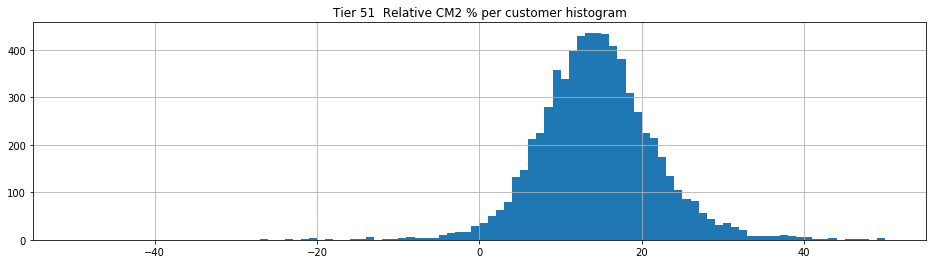

,CM2_REL
count,6849.00
mean,14.51
std,7.15
min,-26.82
25%,10.02
50%,14.25
75%,18.55
max,50.46


CM2% threshold >= 5  is the percentile 7.05
CM2% threshold >= 7  is the percentile 12.28
CM2% threshold >=  11.05  is the percentile 30 allowing us to stay with the 70% of our sample


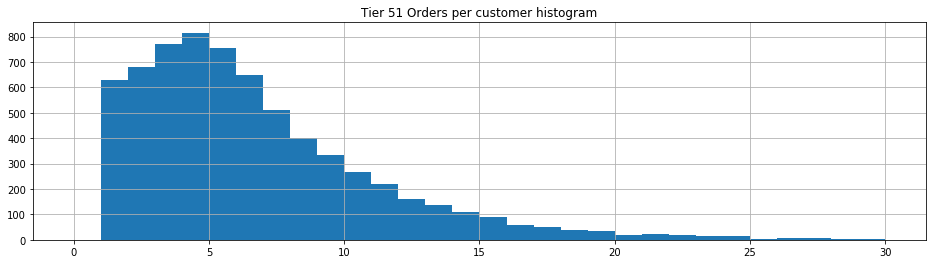

,ORDERS
count,6849.00
mean,6.36
std,4.98
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,72.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  76.48  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  72.4  % from our customers
With CM2% threshold >=  11.05  and Orders >=  3.0  we keep eligible a  57.89  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


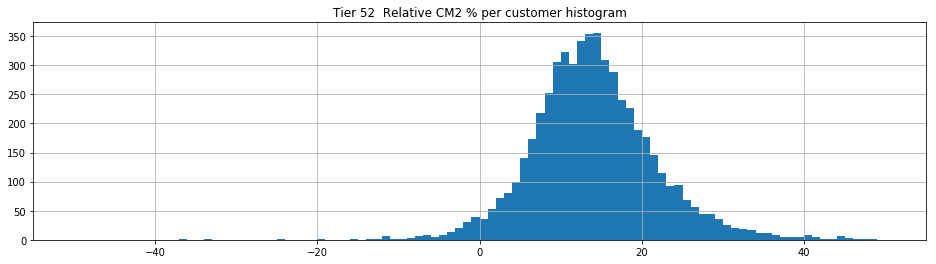

,CM2_REL
count,5544.00
mean,14.04
std,7.64
min,-36.18
25%,9.38
50%,13.61
75%,18.27
max,51.53


CM2% threshold >= 5  is the percentile 8.89
CM2% threshold >= 7  is the percentile 14.57
CM2% threshold >=  10.25  is the percentile 30 allowing us to stay with the 70% of our sample


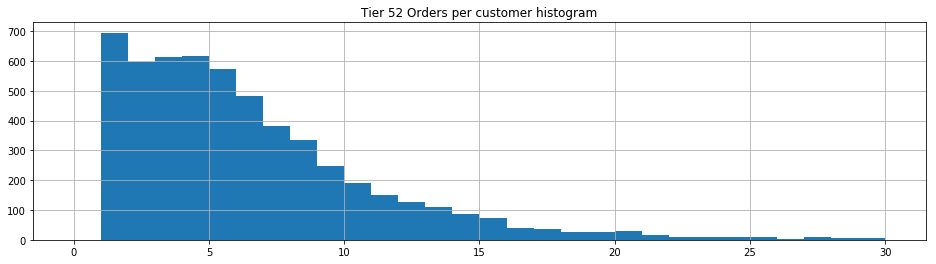

,ORDERS
count,5544.00
mean,6.15
std,5.22
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,85.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  71.21  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  67.03  % from our customers
With CM2% threshold >=  10.25  and Orders >=  3.0  we keep eligible a  54.8  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


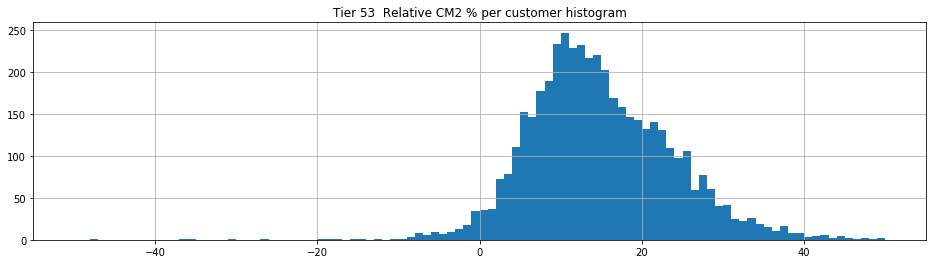

,CM2_REL
count,4493.00
mean,14.68
std,12.08
min,-540.32
25%,9.00
50%,13.82
75%,20.39
max,53.60


CM2% threshold >= 5  is the percentile 10.13
CM2% threshold >= 7  is the percentile 16.78
CM2% threshold >=  9.98  is the percentile 30 allowing us to stay with the 70% of our sample


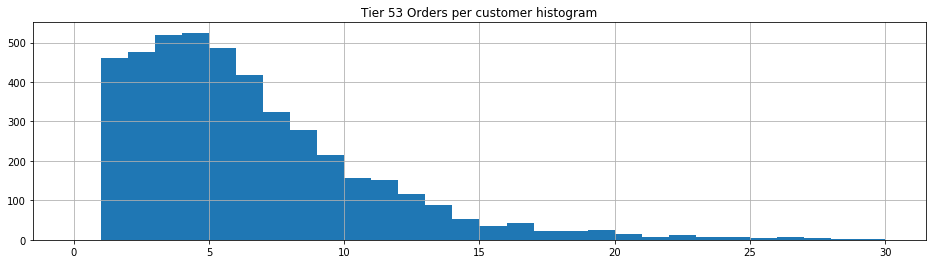

,ORDERS
count,4493.00
mean,6.14
std,4.86
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,67.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  72.45  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  66.95  % from our customers
With CM2% threshold >=  9.98  and Orders >=  3.0  we keep eligible a  55.95  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


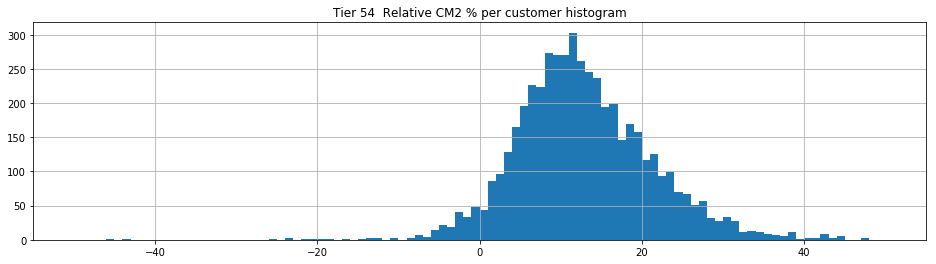

,CM2_REL
count,4992.00
mean,12.78
std,8.84
min,-126.09
25%,7.45
50%,12.01
75%,17.79
max,52.97


CM2% threshold >= 5  is the percentile 14.6
CM2% threshold >= 7  is the percentile 23.06
CM2% threshold >=  8.44  is the percentile 30 allowing us to stay with the 70% of our sample


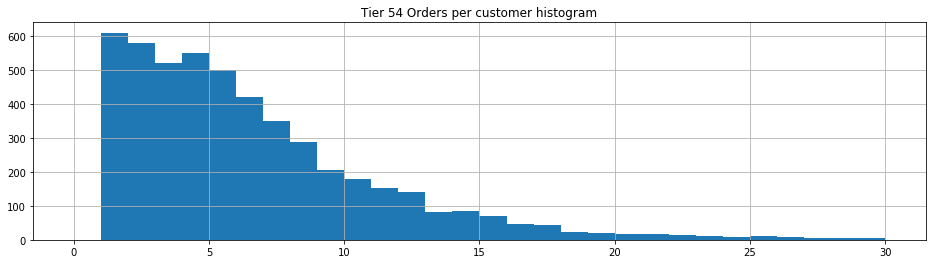

,ORDERS
count,4992.00
mean,6.35
std,5.69
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,97.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  66.43  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  59.64  % from our customers
With CM2% threshold >=  8.44  and Orders >=  3.0  we keep eligible a  54.01  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


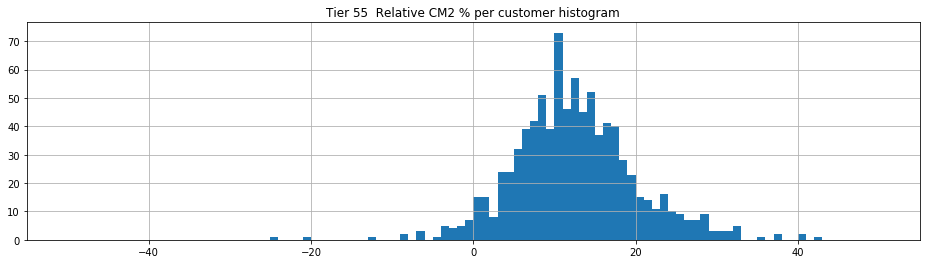

,CM2_REL
count,879.00
mean,12.47
std,7.56
min,-24.10
25%,7.72
50%,12.04
75%,16.76
max,42.12


CM2% threshold >= 5  is the percentile 13.2
CM2% threshold >= 7  is the percentile 21.27
CM2% threshold >=  8.664  is the percentile 30 allowing us to stay with the 70% of our sample


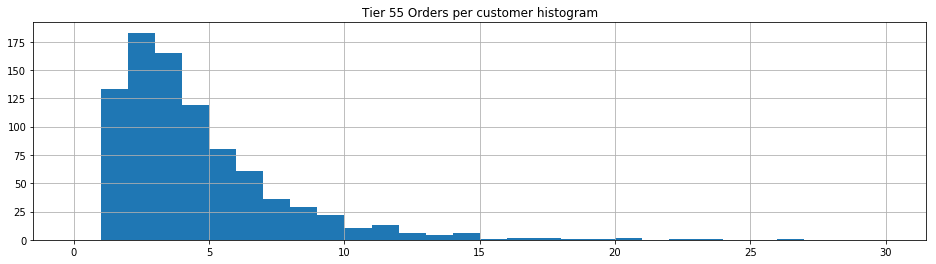

,ORDERS
count,879.00
mean,4.09
std,3.18
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,26.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  74.4  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  67.24  % from our customers
With CM2% threshold >=  8.664  and Orders >=  2.0  we keep eligible a  59.39  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


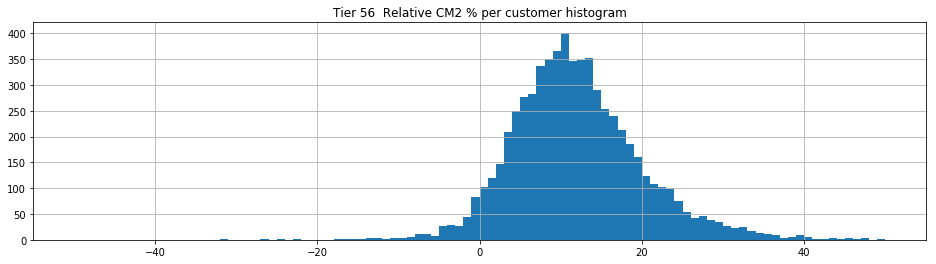

,CM2_REL
count,6389.00
mean,11.97
std,8.08
min,-70.95
25%,6.85
50%,11.26
75%,16.40
max,49.65


CM2% threshold >= 5  is the percentile 17.12
CM2% threshold >= 7  is the percentile 25.86
CM2% threshold >=  7.763999999999998  is the percentile 30 allowing us to stay with the 70% of our sample


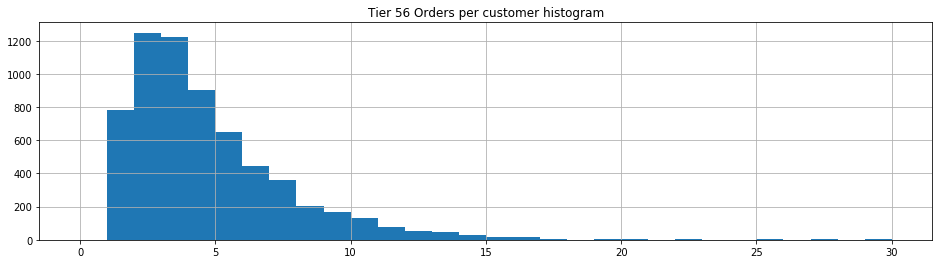

,ORDERS
count,6389.00
mean,4.26
std,3.08
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,40.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  73.63  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  65.74  % from our customers
With CM2% threshold >=  7.763999999999998  and Orders >=  2.0  we keep eligible a  61.78  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,3728.0,63.861086,30.297677,17.631420,44.019594,57.035112,76.256513,530.320900
52,2830.0,74.169358,42.768872,19.864675,49.118192,65.963225,87.774375,1162.207500
53,2400.0,66.588097,31.016456,22.438075,45.658545,59.906613,79.023775,279.726143
54,2487.0,78.758013,41.250019,15.102470,52.913303,70.092962,92.428115,798.102300
55,357.0,54.959582,24.543893,20.772725,39.210770,48.335156,66.100614,233.586750
56,2859.0,65.504241,30.126291,18.652940,45.355365,58.585383,78.076810,359.066225


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,3728.0,14.654804,6.354911,-13.79,10.5000,14.365,18.3225,46.21
52,2830.0,14.018943,6.852714,-8.23,9.5400,13.570,17.9000,47.64
53,2400.0,14.916567,8.166576,-36.89,9.0875,13.795,20.4225,48.67
54,2487.0,12.805774,7.923493,-75.18,7.5700,11.820,17.5600,44.43
55,357.0,12.186471,6.361260,-4.79,8.1000,11.680,15.9500,32.10
56,2859.0,11.578073,7.002315,-12.95,6.9900,10.870,15.6300,47.30


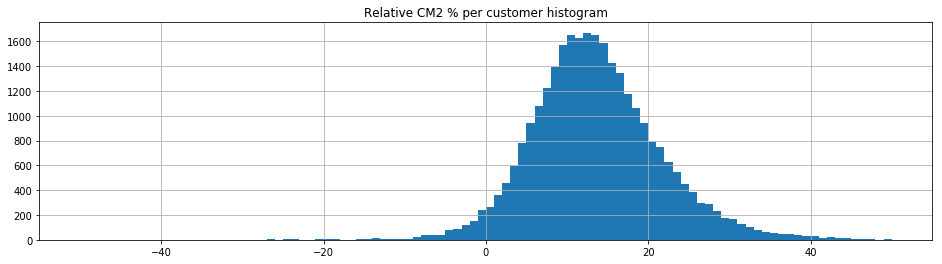

,CM2_REL
count,29146.00
mean,13.53
std,8.72
min,-540.32
25%,8.48
50%,13.02
75%,18.12
max,53.60


CM2% threshold >= 5  is the percentile 11.56
CM2% threshold >= 6  is the percentile 14.8
CM2% threshold >= 7  is the percentile 18.5
CM2% threshold >= 8  is the percentile 22.69
CM2% threshold >= 9  is the percentile 27.48
CM2% threshold >= 10  is the percentile 32.88
CM2% threshold >=  9.48  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

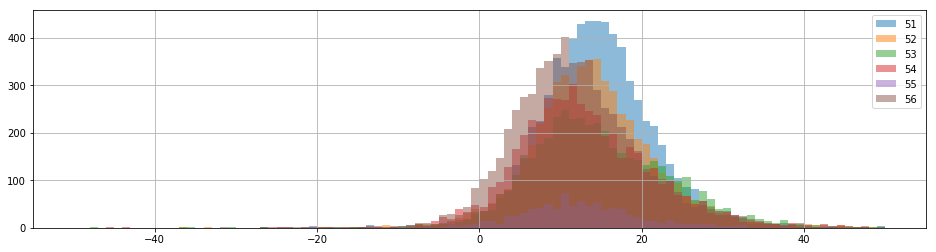

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   